<img src="https://aihub.or.kr/web-nas/aihub21/files/editor/2022/06/13dabc7c0e4042e5a7d6c23c3f7422ef.png">

* https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=582

In [ ]:
# glob, pandas, tqdm
from glob import glob
import pandas as pd
from tqdm import tqdm

In [ ]:
# 샘플 데이터를 업로드한 위치 지정
# 샘플 데이터는 AI 허브의 '요약문 및 레포트 생성 데이터'의 샘플 1,000건만 사용 (회원 가입 후 다운로드 가능)
# 출처: https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=582
DATA_PATH = 'AIHUB'

In [ ]:
# 파일 업로드 후 압축해제
!unzip sample.zip -d {DATA_PATH}

In [8]:
# 실제로 해당 위치에 데이터가 잘 있는지 확인
sorted(glob(f"{DATA_PATH}/*"))

['AIHUB/01.news_r',
 'AIHUB/02.briefing',
 'AIHUB/03.his_cul',
 'AIHUB/04.paper',
 'AIHUB/05.minute',
 'AIHUB/06.edit',
 'AIHUB/07.public',
 'AIHUB/08.speech',
 'AIHUB/09.literature',
 'AIHUB/10.narration']

## 파일 목록 가져오기

In [10]:
# 다음 패턴의 파일 가져오기 f"{DATA_PATH}/*/2~3sent/*.json"
file_json_list = glob(f"{DATA_PATH}/*/2~3sent/*.json")
file_json_list[:5]

['AIHUB/06.edit/2~3sent/REPORT-edit-10006-00001.json',
 'AIHUB/06.edit/2~3sent/REPORT-edit-00029-00001.json',
 'AIHUB/06.edit/2~3sent/REPORT-edit-00049-00003.json',
 'AIHUB/06.edit/2~3sent/REPORT-edit-00088-00001.json',
 'AIHUB/06.edit/2~3sent/REPORT-edit-00025-00002.json']

In [11]:
# read_json 으로 일부 파일 확인
temp_data = pd.read_json(file_json_list[0])
temp_data

,Meta(Acqusition),Meta(Refine),Annotation
doc_id,REPORT-edit-10006,NaN,NaN
doc_category,REPORT,NaN,NaN
doc_type,edit,NaN,NaN
doc_name,"美中정상회담, 바이든은 ‘규칙’ 시진핑은 ‘상호존중’ 강조",NaN,NaN
author,None,NaN,NaN
publisher,None,NaN,NaN
publisher_year,None,NaN,NaN
doc_origin,월간조선,NaN,NaN
passage_id,NaN,REPORT-edit-10006-00001,NaN
passage,NaN,바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 ...,NaN


In [12]:
summary_dataset = []
# 전체 문단 데이터
article = temp_data['Meta(Refine)']['passage']

# 요약문은 총 4종류 - 있을수도 없을수도 있음
# 첫번째 요약문 하나만 사용
summary = temp_data['Annotation']['summary1']

# [전체 문단, 요약문] 으로 묶어서 추가
summary_dataset.append([article, summary])
summary_dataset[:3]

[['바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 가운데 열린 회담이라 전 세계가 이목을 집중했다. 화상으로 진행된 회담은 미국시간으로 15일 오후 7시 50분쯤, 중국시간으로 16일 오전 8시 50분쯤 시작했다.\n두 정상은 모두발언에서 상호 간 협력의 필요성을 강조한 후 본론에 들어갔다. 바이든 대통령은 “미국과 중국의 지도자로서의 책임은 양국 관계가 공개적인 충돌로 바뀌지 않게 하는 것”이라고 말했다. 그러면서 “우리는 양국 국민뿐만 아니라 세계에 대해서도 책임이 있다”면서 “각국은 규칙에 따라 행동해야 하며 미국은 미국의 가치를 따를 것”이라고 했다. 이와 함께 인권에서 인도·태평양 이슈에 이르기까지 미국이 우려하는 분야에 대해 시 주석과 논의할 것이라고 말했다.\n바이든 발언 후 입은 연 시 주석은 “현재 미·중 양국 발전은 모두 결정적 단계에 와 있고 인류의 지구촌은 많은 도전에 직면해 있다”면서 “미·중은 세계 2대 경제 대국이자 유엔 안전보장이사회 상임이사국으로서 소통과 협력을 강화해야 한다”라고 했다. 그러면서 “양국은 자국 내 일을 잘 처리하는 동시에 국제적인 책임도 져야 하고 인류 평화와 발전의 위대한 사업을 공동 추진해야 한다”면서 “이는 양국과 양국 국민 공동의 바람이자 미·중 양국 지도자의 공동의 사명”이라고 했다.\n시 주석은 “중국과 미국은 서로 존중하고 평화롭게 공존하고 협력해서 윈윈해야 한다”면서도 “중·미가 각각 발전을 촉진하고 평화롭고 안정적인 국제 환경을 유지해야 한다”며 미국의 간섭과 개입을 경계하는 목소리도 냈다.\n',
  '미중 갈등이 심화된 가운데 바이든 대통령과 시진핑 주석의 첫 정상회담이 열리자 전 세계의 이목이 집중됐고 두 정상은 상호 간 협력의 필요성을 강조했다.']]

In [14]:
# 반복문으로 모든 파일 목록 가져오기
summary_dataset = []
for file_name in tqdm(file_json_list):

    temp_data = pd.read_json(file_name)

    # 전체 문단 데이터
    article = temp_data['Meta(Refine)']['passage']

    # 요약문은 총 4종류 - 있을수도 없을수도 있음
    # 첫번째 요약문 하나만 사용
    summary = temp_data['Annotation']['summary1']

    # [전체 문단, 요약문] 으로 묶어서 추가
    summary_dataset.append([article, summary])
summary_dataset[:5]

100%|██████████| 1000/1000 [00:05<00:00, 176.75it/s]


[['바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 가운데 열린 회담이라 전 세계가 이목을 집중했다. 화상으로 진행된 회담은 미국시간으로 15일 오후 7시 50분쯤, 중국시간으로 16일 오전 8시 50분쯤 시작했다.\n두 정상은 모두발언에서 상호 간 협력의 필요성을 강조한 후 본론에 들어갔다. 바이든 대통령은 “미국과 중국의 지도자로서의 책임은 양국 관계가 공개적인 충돌로 바뀌지 않게 하는 것”이라고 말했다. 그러면서 “우리는 양국 국민뿐만 아니라 세계에 대해서도 책임이 있다”면서 “각국은 규칙에 따라 행동해야 하며 미국은 미국의 가치를 따를 것”이라고 했다. 이와 함께 인권에서 인도·태평양 이슈에 이르기까지 미국이 우려하는 분야에 대해 시 주석과 논의할 것이라고 말했다.\n바이든 발언 후 입은 연 시 주석은 “현재 미·중 양국 발전은 모두 결정적 단계에 와 있고 인류의 지구촌은 많은 도전에 직면해 있다”면서 “미·중은 세계 2대 경제 대국이자 유엔 안전보장이사회 상임이사국으로서 소통과 협력을 강화해야 한다”라고 했다. 그러면서 “양국은 자국 내 일을 잘 처리하는 동시에 국제적인 책임도 져야 하고 인류 평화와 발전의 위대한 사업을 공동 추진해야 한다”면서 “이는 양국과 양국 국민 공동의 바람이자 미·중 양국 지도자의 공동의 사명”이라고 했다.\n시 주석은 “중국과 미국은 서로 존중하고 평화롭게 공존하고 협력해서 윈윈해야 한다”면서도 “중·미가 각각 발전을 촉진하고 평화롭고 안정적인 국제 환경을 유지해야 한다”며 미국의 간섭과 개입을 경계하는 목소리도 냈다.\n',
  '미중 갈등이 심화된 가운데 바이든 대통령과 시진핑 주석의 첫 정상회담이 열리자 전 세계의 이목이 집중됐고 두 정상은 상호 간 협력의 필요성을 강조했다.'],
 ['이회창 전 한나라당 총재가1997년과2002년 대선을 복기(復棋)했다면JP(김종필)를 우선 떠올렸을 것 같다.\n대선 판세가 갈수록 악화되고 있었기 때문이었다.\n이 후보의 지지율이 김대중 새정치국민

In [16]:
# 데이터 프레임으로 만들기
# columns=["article", "summary"])
df = pd.DataFrame(summary_dataset, columns=["article", "summary"])
df

,article,summary
0,바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 ...,미중 갈등이 심화된 가운데 바이든 대통령과 시진핑 주석의 첫 정상회담이 열리자 전 ...
1,이회창 전 한나라당 총재가1997년과2002년 대선을 복기(復棋)했다면JP(김종필)...,JP와의 연대로 충청권 지지세를 확산할 것을 호소하는 당료들의 호소가 있었으나 이 ...
2,이 같은 발언은 특히 집권당인 민자당의 계파 갈등과 맞물려 공화계(JP 세력)의 거...,JP는 호적상 69세로 1992년 대선 패배 후 정계 은퇴를 선언했던 DJ가 정계 ...
3,브라질 ‘좌파의 대부‘ 룰라 전 대통령을 그린 넷플릭스 다큐 영화 ’위기의 민주주의...,문 대통령은 경남 양산에 농지가 포함된 땅을 퇴임 후 사저용으로 구입했지만 농지를 ...
4,한나라당 이명박 후보는 김영삼(YS) 전 대통령과 측근 세력의 지지를 이끌어냈다. ...,1992년 총선을 앞두고 YS에 의해 영입되어 정치권에 입문한 한나라당의 이 후보는...
...,...,...
995,부산광역시 거제2구역 주택재개발정비구역 내 초등학교를 신설해 달라는 아파트 입주예...,부산광역시 주택재개발정비구역 내 초등학교를 신설해 달라는 집단민원에 대해 조정 여부...
996,"\n 국민권익위원회(위원장 전현희, 이하 국민권익위)는 지난 3월 30일 더불어...",국민권익위원회는 임시 전원위원회를 개최해 민주당 소속 국회의원과 배우자 및 직계존비...
997,산업통상자원부(장관 문승욱)는 저소득층 에너지비용을 지원하는 ‘21년도 에너지바우...,에너지바우처는 동‧하절기 냉‧난방을 위한 에너지 비용을 보조하는 사업으로 실물 카드...
998,앞으로 첨단기술을 통해 산사태 위험 신호를 미리 감지해 사전에 대응해 산사태로 인...,케이산사태방지 대책의 일환으로 4차 산업혁명 관련 첨단 기술을 도입하여 산사태 대응...


## 필요한 데이터만 모으기

In [22]:
# 데이터 개수 확인, 앞의 2개 확인
display(df.iloc[0, 0])
print("-----------------")
display(df.iloc[0, 1])

'바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 가운데 열린 회담이라 전 세계가 이목을 집중했다. 화상으로 진행된 회담은 미국시간으로 15일 오후 7시 50분쯤, 중국시간으로 16일 오전 8시 50분쯤 시작했다.\n두 정상은 모두발언에서 상호 간 협력의 필요성을 강조한 후 본론에 들어갔다. 바이든 대통령은 “미국과 중국의 지도자로서의 책임은 양국 관계가 공개적인 충돌로 바뀌지 않게 하는 것”이라고 말했다. 그러면서 “우리는 양국 국민뿐만 아니라 세계에 대해서도 책임이 있다”면서 “각국은 규칙에 따라 행동해야 하며 미국은 미국의 가치를 따를 것”이라고 했다. 이와 함께 인권에서 인도·태평양 이슈에 이르기까지 미국이 우려하는 분야에 대해 시 주석과 논의할 것이라고 말했다.\n바이든 발언 후 입은 연 시 주석은 “현재 미·중 양국 발전은 모두 결정적 단계에 와 있고 인류의 지구촌은 많은 도전에 직면해 있다”면서 “미·중은 세계 2대 경제 대국이자 유엔 안전보장이사회 상임이사국으로서 소통과 협력을 강화해야 한다”라고 했다. 그러면서 “양국은 자국 내 일을 잘 처리하는 동시에 국제적인 책임도 져야 하고 인류 평화와 발전의 위대한 사업을 공동 추진해야 한다”면서 “이는 양국과 양국 국민 공동의 바람이자 미·중 양국 지도자의 공동의 사명”이라고 했다.\n시 주석은 “중국과 미국은 서로 존중하고 평화롭게 공존하고 협력해서 윈윈해야 한다”면서도 “중·미가 각각 발전을 촉진하고 평화롭고 안정적인 국제 환경을 유지해야 한다”며 미국의 간섭과 개입을 경계하는 목소리도 냈다.\n'

-----------------


'미중 갈등이 심화된 가운데 바이든 대통령과 시진핑 주석의 첫 정상회담이 열리자 전 세계의 이목이 집중됐고 두 정상은 상호 간 협력의 필요성을 강조했다.'

In [26]:
# 텍스트 데이터 길이 분석
df["article_len"] = df["article"].str.len()
df["summary_len"] = df["summary"].str.len()
df.describe()

,article_len,summary_len
count,1000.00000,1000.00000
mean,747.16200,73.76200
std,237.58056,17.67659
min,301.00000,22.00000
25%,669.50000,61.00000
50%,744.00000,75.00000
75%,809.00000,90.00000
max,1489.00000,99.00000


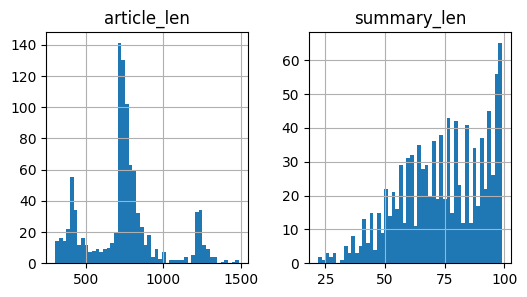

In [29]:
# 텍스트 데이터 길이 시각화
df.hist(figsize=(6, 3), bins=50);

## 저장하기

In [31]:
file_name = "aihub_text.csv"
df.to_csv(file_name, index=False)
pd.read_csv(file_name)

,article,summary,article_len,summary_len
0,바이든 미국 대통령과 시진핑 중국 주석이 첫 정상회담을 했다. 미중 갈등이 심화된 ...,미중 갈등이 심화된 가운데 바이든 대통령과 시진핑 주석의 첫 정상회담이 열리자 전 ...,785,84
1,이회창 전 한나라당 총재가1997년과2002년 대선을 복기(復棋)했다면JP(김종필)...,JP와의 연대로 충청권 지지세를 확산할 것을 호소하는 당료들의 호소가 있었으나 이 ...,742,74
2,이 같은 발언은 특히 집권당인 민자당의 계파 갈등과 맞물려 공화계(JP 세력)의 거...,JP는 호적상 69세로 1992년 대선 패배 후 정계 은퇴를 선언했던 DJ가 정계 ...,708,87
3,브라질 ‘좌파의 대부‘ 룰라 전 대통령을 그린 넷플릭스 다큐 영화 ’위기의 민주주의...,문 대통령은 경남 양산에 농지가 포함된 땅을 퇴임 후 사저용으로 구입했지만 농지를 ...,818,71
4,한나라당 이명박 후보는 김영삼(YS) 전 대통령과 측근 세력의 지지를 이끌어냈다. ...,1992년 총선을 앞두고 YS에 의해 영입되어 정치권에 입문한 한나라당의 이 후보는...,735,68
...,...,...,...,...
995,부산광역시 거제2구역 주택재개발정비구역 내 초등학교를 신설해 달라는 아파트 입주예...,부산광역시 주택재개발정비구역 내 초등학교를 신설해 달라는 집단민원에 대해 조정 여부...,802,91
996,"\n 국민권익위원회(위원장 전현희, 이하 국민권익위)는 지난 3월 30일 더불어...",국민권익위원회는 임시 전원위원회를 개최해 민주당 소속 국회의원과 배우자 및 직계존비...,732,76
997,산업통상자원부(장관 문승욱)는 저소득층 에너지비용을 지원하는 ‘21년도 에너지바우...,에너지바우처는 동‧하절기 냉‧난방을 위한 에너지 비용을 보조하는 사업으로 실물 카드...,769,75
998,앞으로 첨단기술을 통해 산사태 위험 신호를 미리 감지해 사전에 대응해 산사태로 인...,케이산사태방지 대책의 일환으로 4차 산업혁명 관련 첨단 기술을 도입하여 산사태 대응...,838,90


In [32]:
# colab 사용시 파일 다운로드
try:
    from google.colab import files
    files.download(file_name)
except Exception:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>